# Import libs

In [2]:
import sys, os
if not sys.path[0] == os.path.abspath('..'):
    sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [3]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [4]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
nb_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
nb_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
nb_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [5]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.8548387096774194, 0.8064516129032258, 0.8387096774193549, 0.8387096774193549, 0.8548387096774194, 0.8870967741935484, 0.8709677419354839, 0.8548387096774194, 0.7580645161290323, 0.8225806451612904, 0.8225806451612904, 0.7741935483870968, 0.8225806451612904, 0.8225806451612904, 0.8387096774193549, 0.7741935483870968, 0.8225806451612904, 0.9032258064516129, 0.8387096774193549, 0.8064516129032258]

Accuracy:
0.8306451612903223

Standard Deviation:
0.03552050894442781

Confusion Matrix:
    NO  SL  DH
NO  11   2   2
SL   0  33   0
DH   5   0   9
    SL  DH  NO
SL  32   0   0
DH   0   7   7
NO   1   4  11
    SL  DH  NO
SL  31   0   2
DH   0   6   2
NO   1   5  15
    SL  DH  NO
SL  29   0   0
DH   0   5   7
NO   1   2  18
    SL  NO  DH
SL  28   0   0
NO   0  20   3
DH   0   6   5
    NO  SL  DH
NO  17   0   2
SL   2  30   0
DH   3   0   8
    DH  SL  NO
DH  11   0   4
SL   0  25   0
NO   3   1  18
    NO  SL  DH
NO  18   1   3
SL 

# Confusion Matrix Mean

In [6]:
confusion_matrix_mean(knn_confusion_matrix_list)

,NO,SL,DH
NO,16,0,3
SL,0,28,0
DH,4,0,6


# Showing dmc informations computed

In [7]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.7903225806451613, 0.7419354838709677, 0.8064516129032258, 0.8548387096774194, 0.7096774193548387, 0.7903225806451613, 0.7741935483870968, 0.7741935483870968, 0.6129032258064516, 0.7741935483870968, 0.8387096774193549, 0.8225806451612904, 0.7741935483870968, 0.8064516129032258, 0.7741935483870968, 0.8387096774193549, 0.7258064516129032, 0.8064516129032258, 0.7580645161290323, 0.7741935483870968]

Accuracy:
0.7774193548387096

Standard Deviation:
0.052164392350955574

Confusion Matrix:
    NO  SL  DH
NO  12   2   1
SL   2  30   1
DH   7   0   7
    SL  DH  NO
SL  25   2   5
DH   0  11   3
NO   0   6  10
    SL  DH  NO
SL  28   2   3
DH   0   6   2
NO   1   4  16
    SL  DH  NO
SL  25   3   1
DH   0   8   4
NO   1   0  20
    SL  NO  DH
SL  24   3   1
NO   1  13   9
DH   0   4   7
    NO  SL  DH
NO  12   0   7
SL   4  27   1
DH   1   0  10
    DH  SL  NO
DH  11   0   4
SL   0  22   3
NO   6   1  15
    NO  SL  DH
NO  15   1   6
SL

In [8]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,NO,SL,DH
NO,14,0,5
SL,3,25,1
DH,2,0,8


# Showing naive bayes informations computed

In [9]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.8225806451612904, 0.8709677419354839, 0.9032258064516129, 0.8709677419354839, 0.8064516129032258, 0.8548387096774194, 0.8225806451612904, 0.9032258064516129, 0.7096774193548387, 0.8064516129032258, 0.8870967741935484, 0.8225806451612904, 0.8064516129032258, 0.8387096774193549, 0.9032258064516129, 0.8548387096774194, 0.7580645161290323, 0.8709677419354839, 0.7741935483870968, 0.8225806451612904]

Accuracy:
0.8354838709677418

Standard Deviation:
0.04986975752819453

Confusion Matrix:
    NO  SL  DH
NO  11   3   1
SL   0  33   0
DH   7   0   7
    SL  DH  NO
SL  32   0   0
DH   0  10   4
NO   0   4  12
    SL  DH  NO
SL  33   0   0
DH   0   7   1
NO   1   4  16
    SL  DH  NO
SL  29   0   0
DH   0   7   5
NO   3   0  18
    SL  NO  DH
SL  27   1   0
NO   2  15   6
DH   0   3   8
    NO  SL  DH
NO  13   1   5
SL   1  31   0
DH   1   1   9
    DH  SL  NO
DH  11   1   3
SL   0  25   0
NO   5   2  15
    NO  SL  DH
NO  17   1

In [10]:
confusion_matrix_mean(nb_confusion_matrix_list)

,NO,SL,DH
NO,14,1,4
SL,0,29,0
DH,2,0,8


# Choosing two columns from the last X_train and X_test to plot decision surface

In [11]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
155  66.80  14.55
220  44.49  21.79
15   44.32  12.54
83   81.10  24.79
100  84.59  30.36
..     ...    ...
111  85.00  29.61
179  68.72  49.43
40   35.49  11.70
229  43.44  10.10
146  85.58  30.46

[248 rows x 2 columns]
Test dataset:
         0      1
287  33.04  -0.32
80   77.11  30.47
202  76.31  41.93
85   45.44   9.91
122  80.07  48.07
..     ...    ...
76   86.75  36.04
186  81.08  21.26
59   48.11  14.93
6    53.43  15.86
65   83.93  41.29

[62 rows x 2 columns]


# Training the models with the new dataset 2d

In [12]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

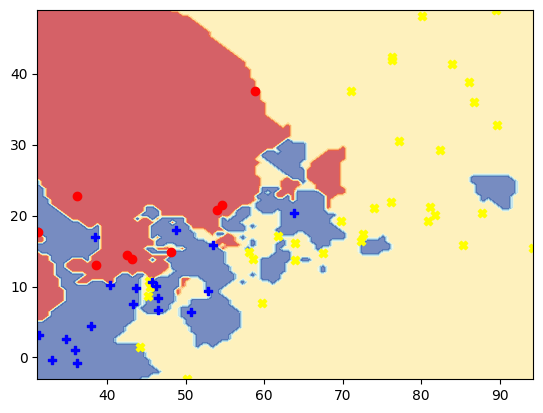

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

dh = np.where(knn_y_pred == 'DH')
sl = np.where(knn_y_pred == 'SL')
no = np.where(knn_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting dmc decision surface

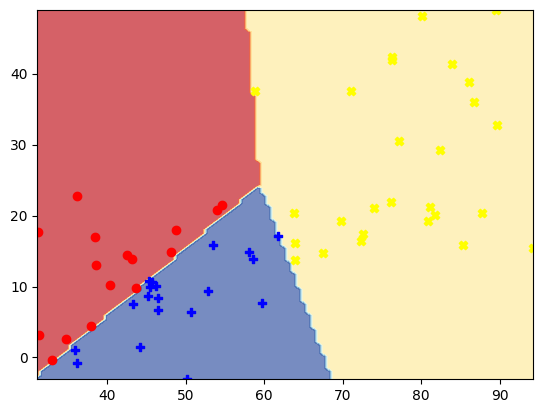

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

dh = np.where(dmc_y_pred == 'DH')
sl = np.where(dmc_y_pred == 'SL')
no = np.where(dmc_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting naive bayes decision surface

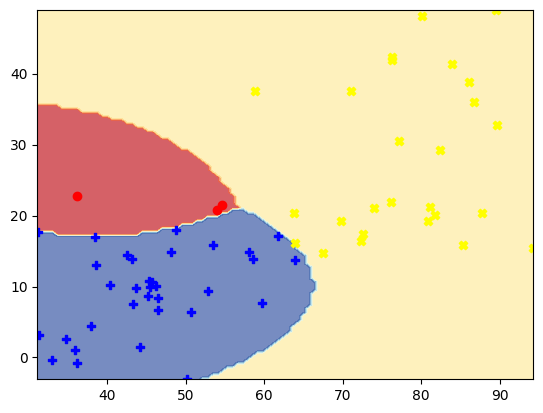

In [15]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

dh = np.where(nb_y_pred == 'DH')
sl = np.where(nb_y_pred == 'SL')
no = np.where(nb_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()